# Tareas

187550 Ana Teresa Calderón Juárez

## Problema 1

**(a)** Usando **SimPy** demostrar que 

$$
\frac{\partial}{\partial \beta_j} \textbf{J}(\beta) = \frac{1}{m}\sum_{i=1}^{m}\left(\hat{y}(x^{(i)}) - y(x^{(i)})\right) \cdot x^{(i)}_j
$$
Para el caso de $\beta_0, \beta_1$ en $J(\beta_0,\beta_1)$.

In [19]:
import sympy as sym
n=sym.symbols('n',integer=True)
m=sym.symbols('m')
x=sym.symbols('x:10')


x2

## Problema 2

Usando el ejemplo de la clase ( i.e. Los archivos `edad.dat` y `altura.dat` contienen las mediciones de las estaturas (en metros) de varios niños entre las edad de 2 y 8 años. Cada _tupla_ de altura y edad, constituyen un ejemplo de entrenamiento $(x^{(i)}, y^{(i)})$ de nuestros datos. Hay $m = 50$ datos para entrenar que usaremos para realizar un modelo de regresión lineal. ) :

**(a)** Grafique $\textbf{J}(\beta)$ del ejercicio en $3D$ y en una gráfica de contorno. 

**(b)** Indique con un punto el valor de $\textbf{J}(\beta)$ en la última iteración.

**(c)** Modifique el _widget_ para mostrar conforme pasan las iteraciones como el valor de $\textbf{J}(\beta)$ se acerca al mínimo en la gráfica de contorno.

**(d)** Agrega al _widget_ un control para modificar $\alpha$ (habrá que agregar el entrenamiento del modelo a la función que estás realizando para este _widget_)

In [69]:
class RegresionLineal:
    def __init__(self, alpha=0.3, max_iters=50, tols=0.001):
        """
        Parámetros.
        ---------------
        alpha = Learning rate
        max_iters = Número máximo de iteraciones
        tols = definición de convergencia
        """
        self.alpha = alpha
        self.max_iters = max_iters
        self.tols = tols
        self.breaking_iteration = None
        self.historia = {'costo':[], 'beta':[]}  # Con fines de graficación
        
       
        
    def gradientDescent(self, x, y):
        """
        Parámetros:
        ---------------
        x = vector de entrenamiento de features
        y = vector de entrenamiento de variable a predecir (target)
        """    
        
        # ajustamos el vector de features
        unos = np.ones((x.shape[0], 1))
        Xt = X.reshape(x.shape[0], 1)
        Xt = np.concatenate((unos, Xt), axis=1)
        
        i = 0
        prep_J = 0
        m, n = Xt.shape
        self.beta = np.zeros(n) 
        
        while i < self.max_iters:     
            # Actualizamos beta
            self.beta = self.beta - self.alpha * self.gradiente(Xt, y)
            
            J = self.costo(Xt, y)
            
            if abs(J - prep_J) <= self.tols:
                
                print('La función convergió con beta: %s en la iteración %i' % ( str(self.beta), i ))
                self.breaking_iteration = i
                break
            else:
                prep_J = J
            
            self.historia['costo'].append(J)
            self.historia['beta'].append(self.beta)                
            i += 1
    
    def hipotesis(self, x):
        return np.dot(x, self.beta)
    
    def costo(self, x, y):
        m = x.shape[0]
        error = self.hipotesis(x) - y
        return np.dot(error.T, error) / (2 * m) 
    
    def gradiente(self, x, y):
        m = x.shape[0]
        error = self.hipotesis(x) - y        
        return np.dot(x.T, error) / m 

None


array([0.13889216, 0.17509421])

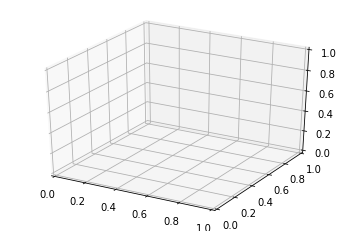

In [70]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact, fixed, widgets
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm

X = np.loadtxt('edad.dat')
Y = np.loadtxt('altura.dat')

r = RegresionLineal(alpha=0.03, max_iters=50, tols=0.0000001)
r.gradientDescent(X,Y)


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')

X, Y = np.meshgrid(X, Y)
x=r.beta[0]*X
y=r.beta[0]*Y
Z=x+y+



#surf = ax.plot_surface(X, Y, Z)

r.beta

In [29]:
interact(plotGuess, x=fixed(X), y=fixed(Y), interceptor=(0,2,0.02), pendiente=(0,2, 0.02));

interactive(children=(FloatSlider(value=1.0, description='interceptor', max=2.0, step=0.02), FloatSlider(value…

In [30]:
r = RegresionLineal(alpha=0.03, max_iters=10000, tols=0.0000001)
r.gradientDescent(X, Y)

La función convergió con beta: [0.73300235 0.06700325] en la iteración 1190


## Problema 3

**(a)**  Usando los datos de `chirps.txt`

In [13]:
%cat chirps.txt

#Chirps/Second 	Temperature (º F)
20.0 	88.6
16.0 	71.6
19.8 	93.3
18.4 	84.3
17.1 	80.6
15.5 	75.2
14.7 	69.7
15.7 	71.6
15.4 	69.4
16.3 	83.3
15.0 	79.6
17.2 	82.6
16.0 	80.6
17.0 	83.5
14.4 	76.3


Entrenar una regresión lineal. Grafique los datos y el mejor modelo. Explique como llegó a los valores de $\alpha$. ¿Coinciden con los mostrados en la página web?

In [15]:
%pylab inline
import matplotlib.pyplot as plt
import numpy as np
#Leer el archivo
arch=open('chirps.txt','r')
tex=arch.read()
arch.close()
x=[]
y=[]
X=[]
Y=[]
#Separar en lista
tex = tex.splitlines()
#Guardar los datos en listas
for i in range(len(tex)):
    tmp = tex[i].split("\t")
    if i==0:
        continue
    y.append(float(tmp[1]))
    Y.append(float(tmp[1]))
    #Agregar un uno, para que se calcule b0 termino independiente
    x.append([1,float(tmp[0])])
    X.append(float(tmp[0]))
#Convertir en matriz para trabajar con el 
x=matrix(x)
#Se transpone la Y por que esta debe de estar en columna 
y=matrix(y).T
#EL mejor modelo por metodo de mínimos cuadrados ordinarios
b=((x.T*x).I)*(x.T*y)
b

Populating the interactive namespace from numpy and matplotlib


matrix([[22.84898231],
        [ 3.410323  ]])

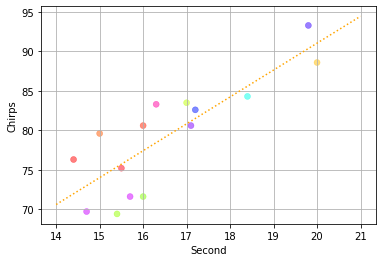

In [176]:
#Generación de colores
theta = 2 * np.pi * np.random.rand(15)

colors = theta
#Graficar puntos
plt.scatter(X,Y, label="data",c=colors,alpha=0.5, linewidth=.5, linestyle="-",cmap='hsv')
#Titulo
plt.xlabel('Second')
plt.ylabel('Chirps')
#Graficar recta
plt.plot([14,21],[float(b[0])+14*float(b[1]),float(b[0])+21*float(b[1])],color="orange", linewidth=1.5, linestyle=":")
plt.grid(True)


**NOTA**: Datos obtenidos de [aquí](http://mathbits.com/MathBits/TISection/Statistics2/linearREAL.htm)


## Problema 4

**(a)** Usando los datos del [cuarteto de Anscombe](http://en.wikipedia.org/wiki/Anscombe%27s_quartet) Calcule la regresión lineal ¿Qué sucede?

In [156]:
x1=[10,8,13,9,11,14,6,4,12,7,5]
y1=[8.04,6.95,7.58,8.81,8.33,9.96,7.24,4.26,10.84,4.82,5.68]
x1=matrix([[1,i] for i in x1])
#Se transpone la Y por que esta debe de estar en columna 
y1=matrix(y1).T
#EL mejor modelo por metodo de mínimos cuadrados ordinarios
b1=((x1.T*x1).I)*(x1.T*y1)

x2=[10,8,13,9,11,14,6,4,12,7,5]
y2=[9.14,8.14,8.74,8.77,9.26,8.10,6.13,3.1,9.13,7.26,4.74]
x2=matrix([[1,i] for i in x2])
#Se transpone la Y por que esta debe de estar en columna 
y2=matrix(y2).T
#EL mejor modelo por metodo de mínimos cuadrados ordinarios
b2=((x2.T*x2).I)*(x2.T*y2)

x3=[10,8,13,9,11,14,6,4,12,7,5]
y3=[7.46,6.77,12.74,7.11,7.81,8.84,6.08,5.39,8.15,6.42,5.73]
x3=matrix([[1,i] for i in x3])
#Se transpone la Y por que esta debe de estar en columna 
y3=matrix(y3).T
#EL mejor modelo por metodo de mínimos cuadrados ordinarios
b3=((x3.T*x3).I)*(x3.T*y3)

x4=[8,8,8,8,8,8,8,19,8,8,8]
y4=[6.58,5.76,7.71,8.84,8.47,7.04,5.25,12.5,5.56,7.91,6.89]
x4=matrix([[1,i] for i in x4])
#Se transpone la Y por que esta debe de estar en columna 
y4=matrix(y4).T
#EL mejor modelo por metodo de mínimos cuadrados ordinarios
b4=((x4.T*x4).I)*(x4.T*y4)

print(b1,'\n\n',b2,'\n\n',b3,'\n\n',b4)
print('Son iguales, (considerando el error de precisión)')

[[3.00009091]
 [0.50009091]] 

 [[3.00090909]
 [0.5       ]] 

 [[3.00245455]
 [0.49972727]] 

 [[3.00172727]
 [0.49990909]]
Son iguales, (considerando el error de precisión)


## Problema 5

Use el archivo `radioactive_decay.dat`

In [9]:
%cat radioactive_decay.txt

#time   N_(remaining)
0.0	10.48
1.0	7.54
2.0	5.49
3.0	4.02
4.0	2.74
5.0	2.02
6.0	1.50
7.0	1.09
8.0	0.68
9.0	0.57
10.0	0.37
11.0	0.31
12.0	0.19
13.0	0.15
14.0	0.13
15.0	0.11


**(a)** Grafique los datos ¿Qué forma tienen?

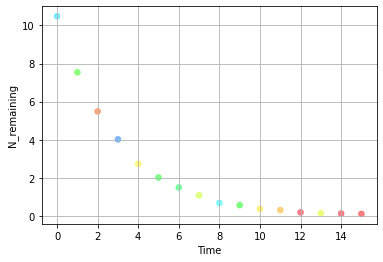

In [16]:

arch=open('radioactive_decay.txt','r')
tex=arch.read()
arch.close()

X=[]
Y=[]
tex = tex.splitlines()
for i in range(len(tex)):
    tmp = tex[i].split("\t")
    if i==0:
        continue
    Y.append(float(tmp[1]))
    X.append(float(tmp[0]))
#Generación de colores
theta = 2 * np.pi * np.random.rand(16)

colors = theta
#Graficación de puntos 
plt.scatter(X,Y, label="data",c=colors,alpha=0.5, linewidth=.5, linestyle="-",cmap='hsv')
#Titulo ejes
plt.xlabel('Time')
plt.ylabel('N_remaining')
plt.grid(True)

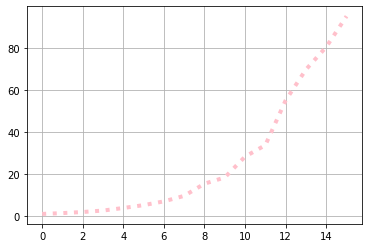

In [184]:
plt.plot([i for i in range(0,16)],[10.48/i for i in Y],color="pink", linewidth=4, linestyle=":")
plt.grid(True)
#Primera transformacion 10.48/i para que se vea tipo exponencial


**(b)** ¿Qué transformación se le ocurre para linearizarlos? Explique y grafique de nuevo. Guarde los datos transformados en un archivo llamado `transform_radioactive_decay.txt`

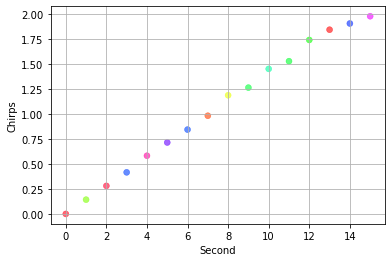

In [17]:
#Ya que se veia de tipo exponencial le apliqué log10 y queda casi recta
Y=[np.log10(10.48/i) for i in Y]
#Generación de colores
theta = 2 * np.pi * np.random.rand(16)

colors = theta
#Graficar puntos
plt.scatter(X,Y, label="data",c=colors,alpha=0.6, linewidth=.5, linestyle="-",cmap='hsv')
plt.xlabel('Second')
plt.ylabel('Chirps')
plt.grid(True)

In [145]:
file=open('transform_radioactive_decay.txt','w')
for i in range(len(X)+1):
    if i==0:
        file.write('Time \t log10(10.48/N_remaining) \n')
        continue
    file.write(str(X[i-1])+'\t'+str(Y[i-1])+'\n')
file.close()
%cat transform_radioactive_decay.txt

Time 	 log10(10.48/N_remaining) 
0.0	0.0
1.0	0.1429899367779338
2.0	0.28078893819761597
3.0	0.4161352295632379
4.0	0.5826107198273198
5.0	0.7150099132010841
6.0	0.8442700235920266
7.0	0.9829347847070842
8.0	1.1878523699414716
9.0	1.2644864269752165
10.0	1.4521595585807128
11.0	1.5289995888134351
12.0	1.741607681694879
13.0	1.8442700235920266
14.0	1.906417930340871
15.0	1.9789685974894828


**(c)** Aplique la regresión lineal a este conjunto de datos transformado, leyendo los datos del archivo recién creado.

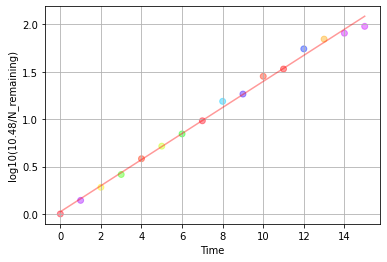

In [192]:
arch=open('transform_radioactive_decay.txt','r')
tex=arch.read()
arch.close()
x=[]
y=[]
X=[]
Y=[]
tex = tex.splitlines()
for i in range(len(tex)):
    tmp = tex[i].split("\t")
    if i==0:
        continue
    y.append(float(tmp[1]))
    Y.append(float(tmp[1]))
    x.append([1,float(tmp[0])])
    X.append(float(tmp[0]))
x=matrix(x)
y=matrix(y).T
#EL mejor modelo 
b=((x.T*x).I)*(x.T*y)
#Generación de colores
theta = 2 * np.pi * np.random.rand(16)

colors = theta
plt.scatter(X,Y, label="data",c=colors,alpha=0.4, linewidth=1, linestyle="-",cmap='hsv')
plt.xlabel('Time')
plt.ylabel('log10(10.48/N_remaining)')
plt.plot([0,15],[float(b[0])+0*float(b[1]),float(b[0])+15*float(b[1])],color='red',alpha=0.4)
plt.grid(True)

**(d)** ¿Cuáles son los valores de $\beta$ que mejor ajustan? ¿Cuáles son el espacio sin transformar? Explique.

In [155]:
print(float(b[0]),float(b[1]))

0.022954071025364176 0.1375186382240714
